In [1]:
import numpy as np
import pandas as pd

import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.cluster import KMeans

In [23]:
%matplotlib inline
rcParams["figure.figsize"]= 15,15


In [24]:
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [25]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

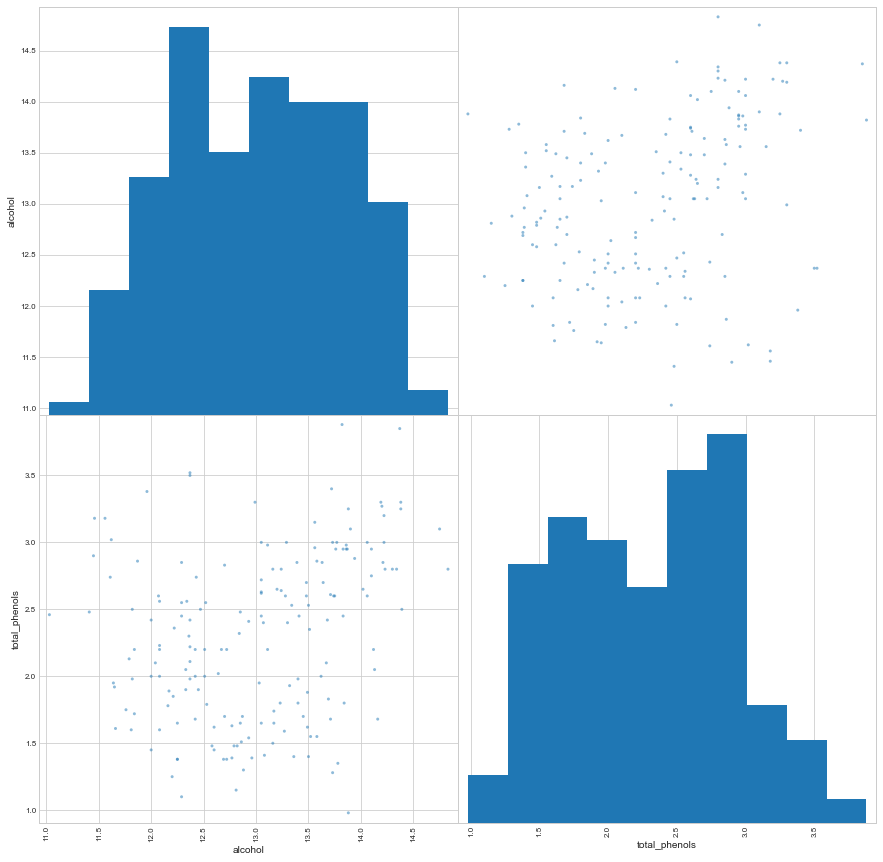

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

# Grinding the best features 

In [27]:
X = wine[['alcohol', 'total_phenols']]

#unsupervised machine learning models do not require to split data 
#into training and testing sets since there is no ground truth to validate the model

# Scaler

In [28]:
#z = (x - mean) / std
from sklearn.preprocessing import StandardScaler
# instantiate the scaler
scale = StandardScaler()
# compute the mean and std to be used later for scaling
scale.fit(X)
# StandardScaler(copy=True, with_mean=True, with_std=True)

X_scaled = scale.transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 7.84141790e-15 -1.95536471e-16]
[1. 1.]


# KMean

In [29]:
from sklearn.cluster import KMeans
# instantiate the model
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(X_scaled)
# make predictions
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 1 0 1 0 1 2 0 2 0
 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]


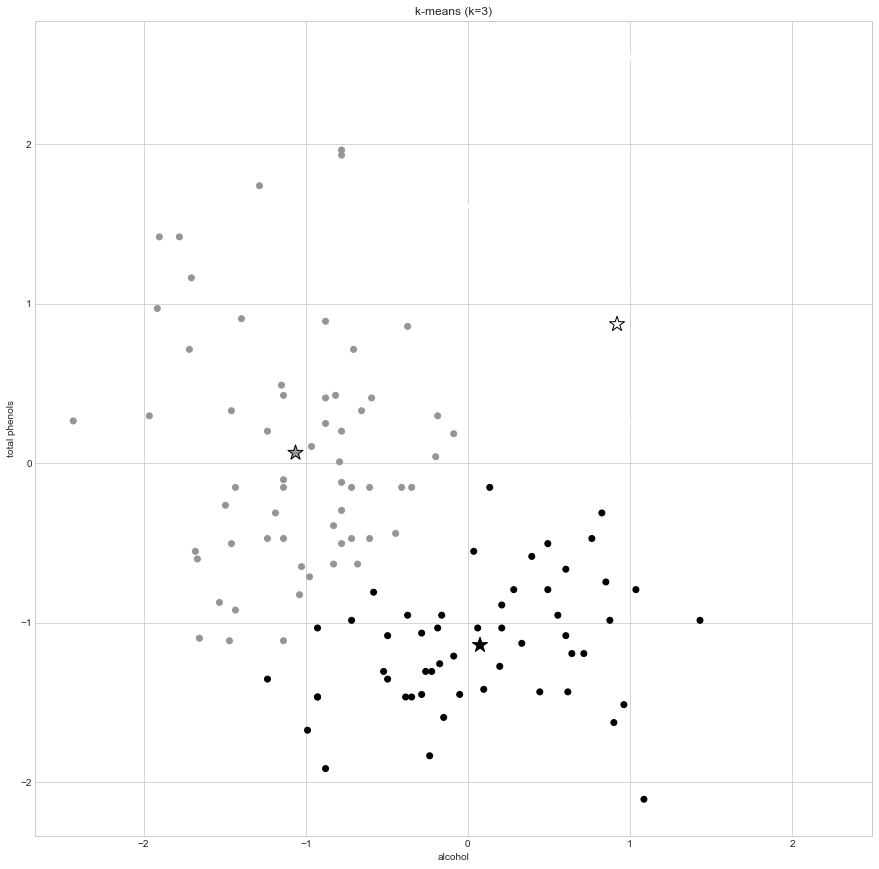

In [31]:
import matplotlib.pyplot as plt
# plot the scaled data
plt.scatter(X_scaled[:,0], X_scaled[:,1], c= y_pred)
# identify the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="*", s = 250, c = [0,1,2], edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.savefig("plot.png")
plt.show()